In [1]:
%matplotlib inline 
from scipy import stats
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np


In [2]:
vaccine_data_to_load = "vaccine-preventable-disease-cases-by-county-and-year-2.csv" 


#Read the Mouse and Drug Data and the Clinical Trial Data
Vax_Data = pd.read_csv("vaccine-preventable-disease-cases-by-county-and-year-2.csv") 
print(Vax_Data.iloc[:,1].unique())
file = 'Population_Data.csv'
pop_read = pd.read_csv(file)
pop_read
pop_years = pop_read.drop(['2018'], axis = 1)
pop_years_3 = pop_years.set_index("County")
pop_years_3

['Alameda' 'Alpine' 'Amador' 'Butte' 'Calaveras' 'California' 'Colusa'
 'Contra Costa' 'Del Norte' 'El Dorado' 'Fresno' 'Glenn' 'Humboldt'
 'Imperial' 'Inyo' 'Kern' 'Kings' 'Lake' 'Lassen' 'Los Angeles' 'Madera'
 'Marin' 'Mariposa' 'Mendocino' 'Merced' 'Modoc' 'Mono' 'Monterey' 'Napa'
 'Nevada' 'Orange' 'Placer' 'Plumas' 'Riverside' 'Sacramento' 'San Benito'
 'San Bernardino' 'San Diego' 'San Francisco' 'San Joaquin'
 'San Luis Obispo' 'San Mateo' 'Santa Barbara' 'Santa Clara' 'Santa Cruz'
 'Shasta' 'Sierra' 'Siskiyou' 'Solano' 'Sonoma' 'Stanislaus' 'Sutter'
 'Tehama' 'Trinity' 'Tulare' 'Tuolumne' 'Ventura' 'Yolo' 'Yuba']


,2009,2010,2011,2012,2013,2014,2015,2016,2017
County,,,,,,,,,
Alameda County,1491482,1513043,1530998,1554138,1580247,1608674,1634634,1650306,1658131
El Dorado County,178447,181133,180918,180578,181497,183161,184660,186082,188722
Kern County,807407,841072,848140,853963,862557,869957,877197,882361,888988
Los Angeles County,9848011,9822433,9876727,9938436,9998105,10048408,10097037,10120540,10118759
Merced County,245321,256732,259333,260971,262198,264649,266651,267971,271340
Napa County,134650,136808,137750,138625,139706,140567,141096,141185,140386
Orange County,3026786,3016559,3050867,3080419,3108009,3130322,3153962,3170707,3179950
Sacramento County,1400949,1421414,1433739,1445078,1457750,1475618,1494294,1511510,1527718
San Diego County,3053793,3103306,3137372,3175201,3211248,3250993,3284061,3310280,3325468


In [35]:

#dd_complete_15_pivot = dd_complete_15.pivot_table(index = "year", columns = "Drug")
Vax_Data.head()

,disease,county,year,count
0,Diphtheria,Alameda,2001,0
1,Diphtheria,Alameda,2002,0
2,Diphtheria,Alameda,2003,0
3,Diphtheria,Alameda,2004,0
4,Diphtheria,Alameda,2005,0


In [53]:
#dd_drop = Vax_Data.groupby("disease").first()
#dd_drop.drop(["Diphtheria","Hepatitis A", "Hepatitis B, Acute", "Hepatitis C, Acute", "Invasive Meningococcal Disease", "Rubella", "Varicella Hospitalizations"])
dd = Vax_Data.set_index("disease")
dd_drop = dd.drop(["Diphtheria","Hepatitis A", "Hepatitis B, Acute", "Hepatitis C, Acute", "Invasive Meningococcal Disease", "Rubella", "Varicella Hospitalizations"])
dd_drop = dd_drop.reset_index()
dd_drop_counties = dd_drop.set_index("county")

dd_complete_4 = dd_drop_counties.drop([ 'Alpine', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn' ,'Humboldt',
 'Imperial', 'Inyo', 'Kern' ,'Kings' ,'Lake' ,'Lassen', 'Madera',
 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa',
 'Nevada' ,'Orange', 'Placer' ,'Plumas', 'Riverside', 'Sacramento' ,'San Benito',
 'San Bernardino', 'San Diego' ,'San Francisco', 'San Joaquin',
 'San Luis Obispo', 'San Mateo', 'Santa Barbara' ,'Santa Clara' ,'Santa Cruz',
 'Shasta' ,'Sierra', 'Siskiyou' ,'Solano' ,'Stanislaus', 'Sutter',
 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura' ,'Yolo'])
dd_complete_4 = dd_complete_4.reset_index()

dd_complete_15 = dd_drop_counties.drop([ 'Alpine', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
 'Contra Costa', 'Del Norte', 'Fresno', 'Glenn' ,'Humboldt',
 'Imperial', 'Inyo', 'Kings' ,'Lake' ,'Lassen', 'Madera',
 'Marin', 'Mariposa', 'Mendocino', 'Modoc', 'Mono', 'Monterey',
 'Nevada' , 'Placer' ,'Plumas', 'Riverside' ,'San Benito',
 'San Bernardino' ,'San Francisco', 'San Joaquin',
 'San Luis Obispo' ,'Santa Clara' ,'Santa Cruz',
 'Shasta' , 'Siskiyou' ,'Solano' ,'Stanislaus', 'Sutter',
 'Tehama', 'Trinity', 'Tulare', 'Tuolumne' ,'Yolo'])
dd_complete_15 = dd_complete_15.reset_index()

dd_complete_4.head()
#dd_complete_15.head()
print(dd)


                              county  year  count
disease                                          
Diphtheria                   Alameda  2001      0
Diphtheria                   Alameda  2002      0
Diphtheria                   Alameda  2003      0
Diphtheria                   Alameda  2004      0
Diphtheria                   Alameda  2005      0
Diphtheria                   Alameda  2006      0
Diphtheria                   Alameda  2007      0
Diphtheria                   Alameda  2008      0
Diphtheria                   Alameda  2009      0
Diphtheria                   Alameda  2010      0
Diphtheria                   Alameda  2011      0
Diphtheria                   Alameda  2012      0
Diphtheria                   Alameda  2013      0
Diphtheria                   Alameda  2014      0
Diphtheria                   Alameda  2015      0
Diphtheria                   Alameda  2016      0
Diphtheria                   Alameda  2017      0
Diphtheria                    Alpine  2001      0


In [37]:

#dd_county_year = dd_complete_4.stack()
#dd_county_year = pd.DataFrame(dd_county_year)
#dd_county_year



count                              \
county                             Alameda Alpine    Amador      Butte   
disease                                                                  
Diphtheria                        0.000000    0.0  0.000000   0.000000   
Hepatitis A                       7.857143    0.0  0.000000   1.000000   
Hepatitis B, Acute                6.000000    0.0  0.000000   1.857143   
Hepatitis C, Acute                0.857143    0.0  1.285714   1.857143   
Invasive Meningococcal Disease    6.882353    0.0  0.235294   1.823529   
Measles                           1.176471    0.0  0.058824   0.000000   
Mumps                             6.000000    0.0  0.000000   0.250000   
Pertussis                       131.882353    0.0  2.294118  10.176471   
Rubella                           0.125000    0.0  0.000000   0.000000   
Tetanus                           0.235294    0.0  0.000000   0.000000   
Varicella Hospitalizations        3.000000    0.0  0.000000   0.250000   

                                                                              \
county                         Calaveras   California    Colusa Contra Costa   
disease                                                                        
Diphtheria                      0.000000     0.058824  0.000000     0.000000   
Hepatitis A                     0.285714   304.571429  0.142857     5.571429   
Hepatitis B, Acute              0.000000   135.285714  0.142857     3.142857   
Hepatitis C, Acute              0.000000    74.571429  0.000000     0.142857   
Invasive Meningococcal Disease  0.470588   152.470588  0.117647     5.000000   
Measles                         0.000000    24.764706  0.000000     0.470588   
Mumps                           0.125000    60.750000  0.000000     1.500000   
Pertussis                       4.352941  2810.470588  1.117647    79.941176   
Rubella                         0.000000     0.625000  0.000000     0.000000   
Tetanus                         0.000000     4.764706  0.000000     0.058824   
Varicella Hospitalizations      0.000000    45.500000  0.000000     1.125000   

                                                     ...    year             \
county                         Del Norte  El Dorado  ...  Sonoma Stanislaus   
disease                                              ...                      
Diphtheria                      0.000000   0.000000  ...  2009.0     2009.0   
Hepatitis A                     0.142857   1.285714  ...  2014.0     2014.0   
Hepatitis B, Acute              0.000000   0.571429  ...  2014.0     2014.0   
Hepatitis C, Acute              0.142857   0.857143  ...  2014.0     2014.0   
Invasive Meningococcal Disease  0.176471   0.764706  ...  2009.0     2009.0   
Measles                         0.000000   0.000000  ...  2009.0     2009.0   
Mumps                           0.000000   0.375000  ...  2013.5     2013.5   
Pertussis                       1.235294  14.529412  ...  2009.0     2009.0   
Rubella                         0.000000   0.000000  ...  2013.5     2013.5   
Tetanus                         0.000000   0.058824  ...  2009.0     2009.0   
Varicella Hospitalizations      0.000000   0.000000  ...  2013.5     2013.5   

                                                                         \
county                          Sutter  Tehama Trinity  Tulare Tuolumne   
disease                                                                   
Diphtheria                      2009.0  2009.0  2009.0  2009.0   2009.0   
Hepatitis A                     2014.0  2014.0  2014.0  2014.0   2014.0   
Hepatitis B, Acute              2014.0  2014.0  2014.0  2014.0   2014.0   
Hepatitis C, Acute              2014.0  2014.0  2014.0  2014.0   2014.0   
Invasive Meningococcal Disease  2009.0  2009.0  2009.0  2009.0   2009.0   
Measles                         2009.0  2009.0  2009.0  2009.0   2009.0   
Mumps                           2013.5  2013.5  2013.5  2013.5   2013.5   
Pertussis             

In [77]:

dd_years_09 = dd_complete_15[dd_complete_15["year"]== 2009]
dd_years_10 = dd_complete_15[dd_complete_15["year"]== 2010]
dd_years_11 = dd_complete_15[dd_complete_15["year"]== 2011]
dd_years_12 = dd_complete_15[dd_complete_15["year"]== 2012]
dd_years_13 = dd_complete_15[dd_complete_15["year"]== 2003]
dd_years_14 = dd_complete_15[dd_complete_15["year"]== 2014]
dd_years_15 = dd_complete_15[dd_complete_15["year"]== 2015]
dd_years_16 = dd_complete_15[dd_complete_15["year"]== 2016]
dd_years_17 = dd_complete_15[dd_complete_15["year"]== 2017]


#2009 and 2013 only have 45 data points per column, all the other years have 60 
dd_measles_09 = dd_years_09[dd_years_09["disease"]== "Measles"]
dd_measles_10 = dd_years_10[dd_years_10["disease"]== "Measles"]
dd_measles_11 = dd_years_11[dd_years_11["disease"]== "Measles"]



In [82]:
dyr = dd_complete_4.set_index('year')
dyr
dyrs = dyr.drop([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008])
d_meas_yr_09 = dyrs
ddyr_alameda = dyrs[dyrs["county"]== "Alameda"]
ddyr_alameda_meas = ddyr_alameda[ddyr_alameda["disease"]== "Measles"]

ddyr_LA = dyrs[dyrs["county"]== "Los Angeles"]
ddyr_LA_meas = ddyr_LA[ddyr_alameda["disease"]== "Measles"]


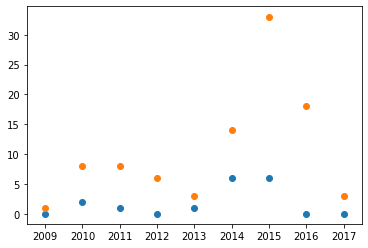

In [83]:
x_axis = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]

plt.scatter(x_axis, ddyr_alameda_meas.iloc[:,2])
plt.scatter(x_axis, ddyr_LA_meas.iloc[:,2])
#plt.scatter(pop_years_3.iloc[:,1], dd_measles_10.iloc[:,3])
#plt.scatter(pop_years_3.iloc[:,2], dd_measles_11.iloc[:,3])